In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as SeabornInstance

from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('brain_size.csv')
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [4]:
data.isnull().any() # check for nulls

Gender                 False
Age Range              False
Head Size(cm^3)        False
Brain Weight(grams)    False
dtype: bool

In [5]:
head_size = data['Head Size(cm^3)'].values.reshape(-1,1) # convert to single feature array
head_size

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177],
       [3585],
       [3785],
       [3559],
       [3613],
       [3982],
       [3443],
       [3993],
       [3640],
       [4208],
       [3832],
       [3876],
       [3497],
       [3466],
       [3095],
       [4424],
       [3878],
       [4046],
       [3804],
       [3710],
       [4747],
       [4423],
       [4036],
       [4022],
       [3454],
       [4175],
       [3787],
       [3796],
       [4103],
       [4161],
       [4158],
       [3814],
       [3527],
       [3748],
       [3334],
       [3492],
       [3962],
       [3505],
       [4315],
       [3804],
       [3863],
       [4034],
       [4308],
       [3165],
       [3641],
       [3644],
       [3891],
       [3793],
       [4270],
       [4063],
       [4012],
       [3458],
       [3890],
       [4166],
       [3935],
       [3669],
       [3866],
       [3393],
       [4442],
       [4253],
       [3727],
       [3329],
       [34

In [6]:
brain_weight = data['Brain Weight(grams)'].values.reshape(-1, 1)  # convert to single feature array
brain_weight

array([[1530],
       [1297],
       [1335],
       [1282],
       [1590],
       [1300],
       [1400],
       [1255],
       [1355],
       [1375],
       [1340],
       [1380],
       [1355],
       [1522],
       [1208],
       [1405],
       [1358],
       [1292],
       [1340],
       [1400],
       [1357],
       [1287],
       [1275],
       [1270],
       [1635],
       [1505],
       [1490],
       [1485],
       [1310],
       [1420],
       [1318],
       [1432],
       [1364],
       [1405],
       [1432],
       [1207],
       [1375],
       [1350],
       [1236],
       [1250],
       [1350],
       [1320],
       [1525],
       [1570],
       [1340],
       [1422],
       [1506],
       [1215],
       [1311],
       [1300],
       [1224],
       [1350],
       [1335],
       [1390],
       [1400],
       [1225],
       [1310],
       [1560],
       [1330],
       [1222],
       [1415],
       [1175],
       [1330],
       [1485],
       [1470],
       [1135],
       [13

In [7]:
linear_regressor = LinearRegression()  
linear_regressor.fit(head_size, brain_weight)
brain_weight_pred = linear_regressor.predict(head_size)

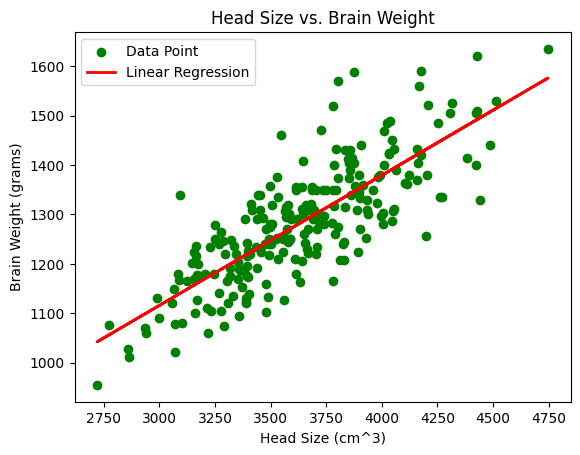

In [8]:
plt.scatter(head_size, brain_weight, c="green", label = 'Data Point')
plt.plot(head_size, brain_weight_pred, color='red', linewidth=2, label = 'Linear Regression')
plt.title('Head Size vs. Brain Weight')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

<Axes: ylabel='Count'>

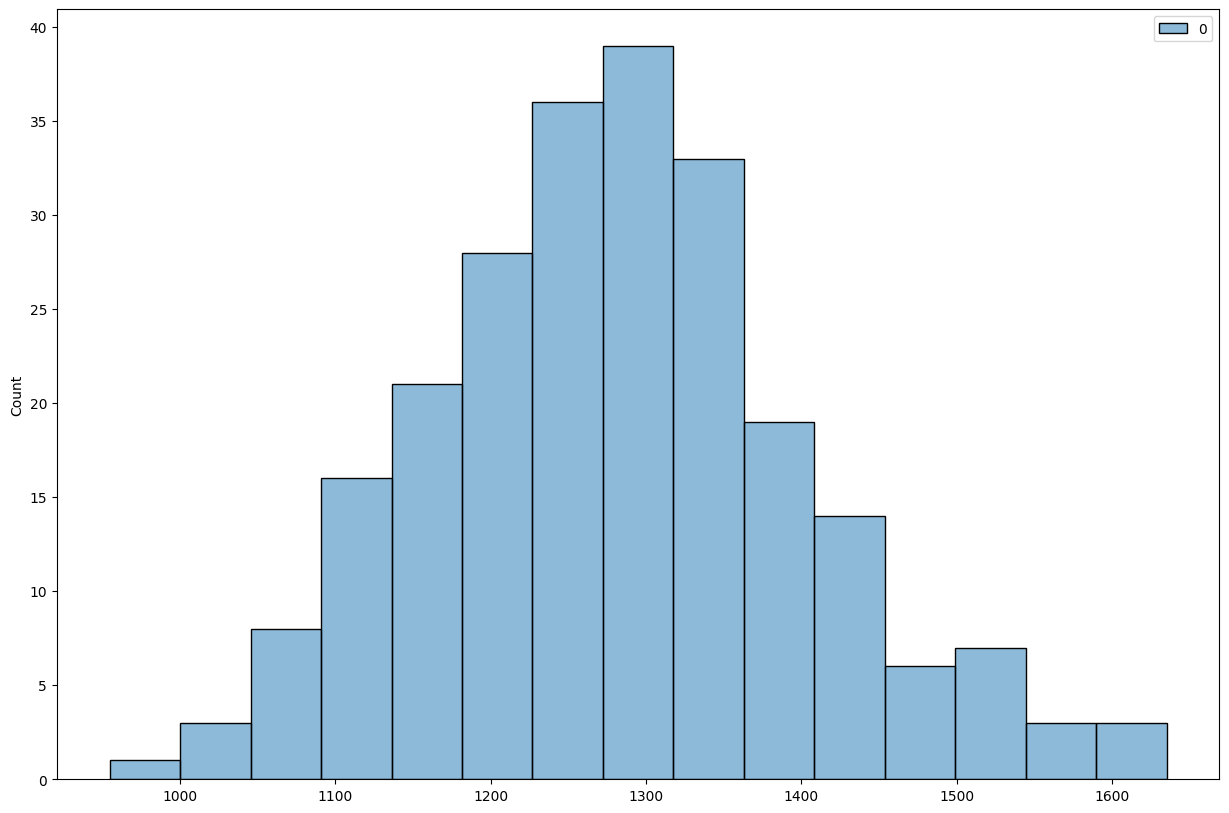

In [9]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
SeabornInstance.histplot(brain_weight)

In [10]:
df = pd.DataFrame({'Actual': np.array(brain_weight).flatten(), 'Predicted': brain_weight_pred.flatten()})
df

,Actual,Predicted
0,1530,1514.166601
1,1297,1310.272292
2,1335,1448.045837
3,1282,1320.546036
4,1590,1425.917772
...,...,...
232,1110,1172.235318
233,1215,1219.652599
234,1104,1177.240476
235,1170,1208.588567


In [11]:
coeff_df = pd.DataFrame(linear_regressor.coef_, pd.DataFrame(head_size).columns, columns=['Coefficient'])
coeff_df

,Coefficient
0,0.263429


In [12]:
# y-intercept
linear_regressor.intercept_

array([325.57342105])